In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE

# 실행되지 않는다면 관련 클래스 설치 필요

In [5]:
# 데이터 로드
data_path ='/content/drive/MyDrive/Colab Notebooks/쿠글11기 발표/health.xlsx'
df = pd.read_excel(data_path)

In [ ]:
# 데이터 확인
df.head()

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,1,0,0,NaN,NaN,2021-12-29
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,NaN,NaN,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,NaN,NaN,2021-12-29
3,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,1,0,1,0.0,0.0,2021-12-29
4,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,1,0,0,NaN,NaN,2021-12-29


In [ ]:
# 데이터 기본 정보 출력
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           1000 non-null   int64         
 1   city_code      1000 non-null   int64         
 2   gender         1000 non-null   int64         
 3   age_code       1000 non-null   int64         
 4   height         1000 non-null   int64         
 5   weight         1000 non-null   int64         
 6   waist          1000 non-null   float64       
 7   eye_left       1000 non-null   float64       
 8   eye_right      1000 non-null   float64       
 9   hear_left      1000 non-null   int64         
 10  hear_right     1000 non-null   int64         
 11  systolic       991 non-null    float64       
 12  diastolic      991 non-null    float64       
 13  blood_sugar    991 non-null    float64       
 14  cholesterol    401 non-null    float64       
 15  triglycerides  401 non

## **기초 통계 분석**

In [ ]:
# 기초 통계 분석
print("평균:\n", df.mean())
print("중앙값:\n", df.median())
print("최빈값:\n", df.mode().iloc[0])

평균:
 year                          2020.0
city_code                     34.135
gender                         1.518
age_code                      11.889
height                       160.715
weight                        62.315
waist                        81.7185
eye_left                      0.9209
eye_right                     0.9196
hear_left                      1.054
hear_right                     1.044
systolic                  124.050454
diastolic                  76.457114
blood_sugar               103.094854
cholesterol               200.007481
triglycerides             129.862843
HDL                        56.546135
LDL                       117.807107
hemoglobin                 14.153986
urine_protein               1.126646
serum                       0.838648
AST                        27.006054
ALT                        26.243189
GTP                        38.612513
smoking                        1.546
drinking                       0.569
oral_check                     0.

### **데이터 시각화**

Q1. 시각화 방법을 보고 _____에 관련 코드를 적어주세요

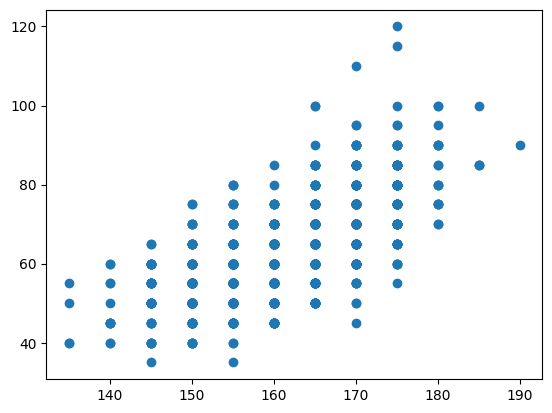

In [ ]:
# 산점도
# 키와 무게간 양의 상관관계 확인
plt.scatter(df['height'],df['weight'])

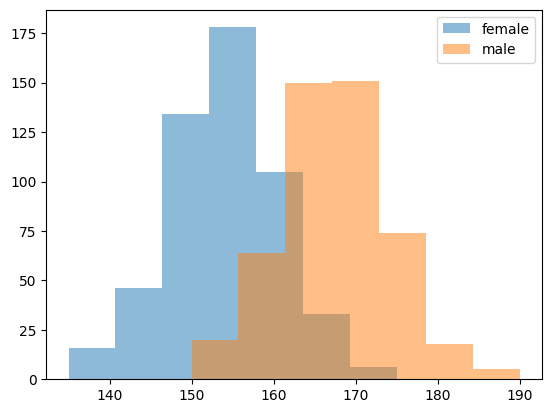

In [ ]:
# 히스토그램
f_h=df.loc[df.gender==2,['gender','height']]
m_h=df.loc[df.gender==1,['gender','height']]
plt.hist(f_h['height'],bins=7,alpha=0.5,label='female') #alpha:투명도
plt.hist(m_h['height'],bins=7,alpha=0.5,label='male')
plt.legend()

<Axes: xlabel='gender', ylabel='weight'>

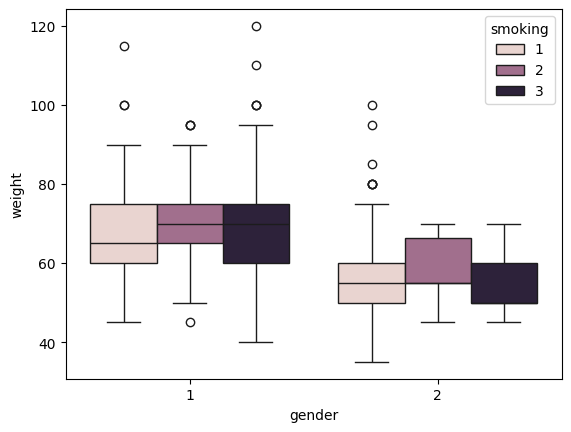

In [ ]:
# 박스플롯 (이상치 확인)
sns.boxplot(data=df,x='gender',y='weight',hue='smoking')

<Axes: >

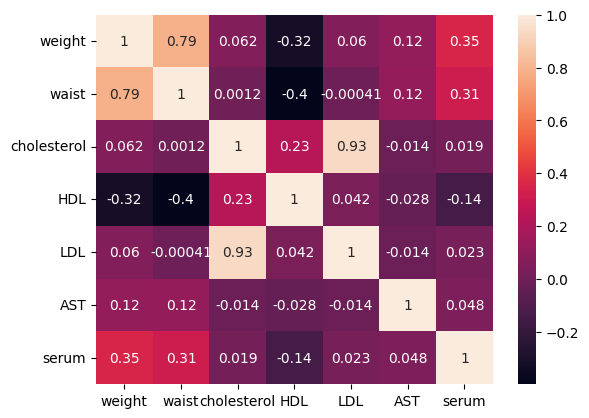

In [ ]:
# 히트맵
x= df.loc[:,['weight','waist','cholesterol','HDL','LDL','AST','serum']]
sns.heatmap(x.corr(),annot=True)

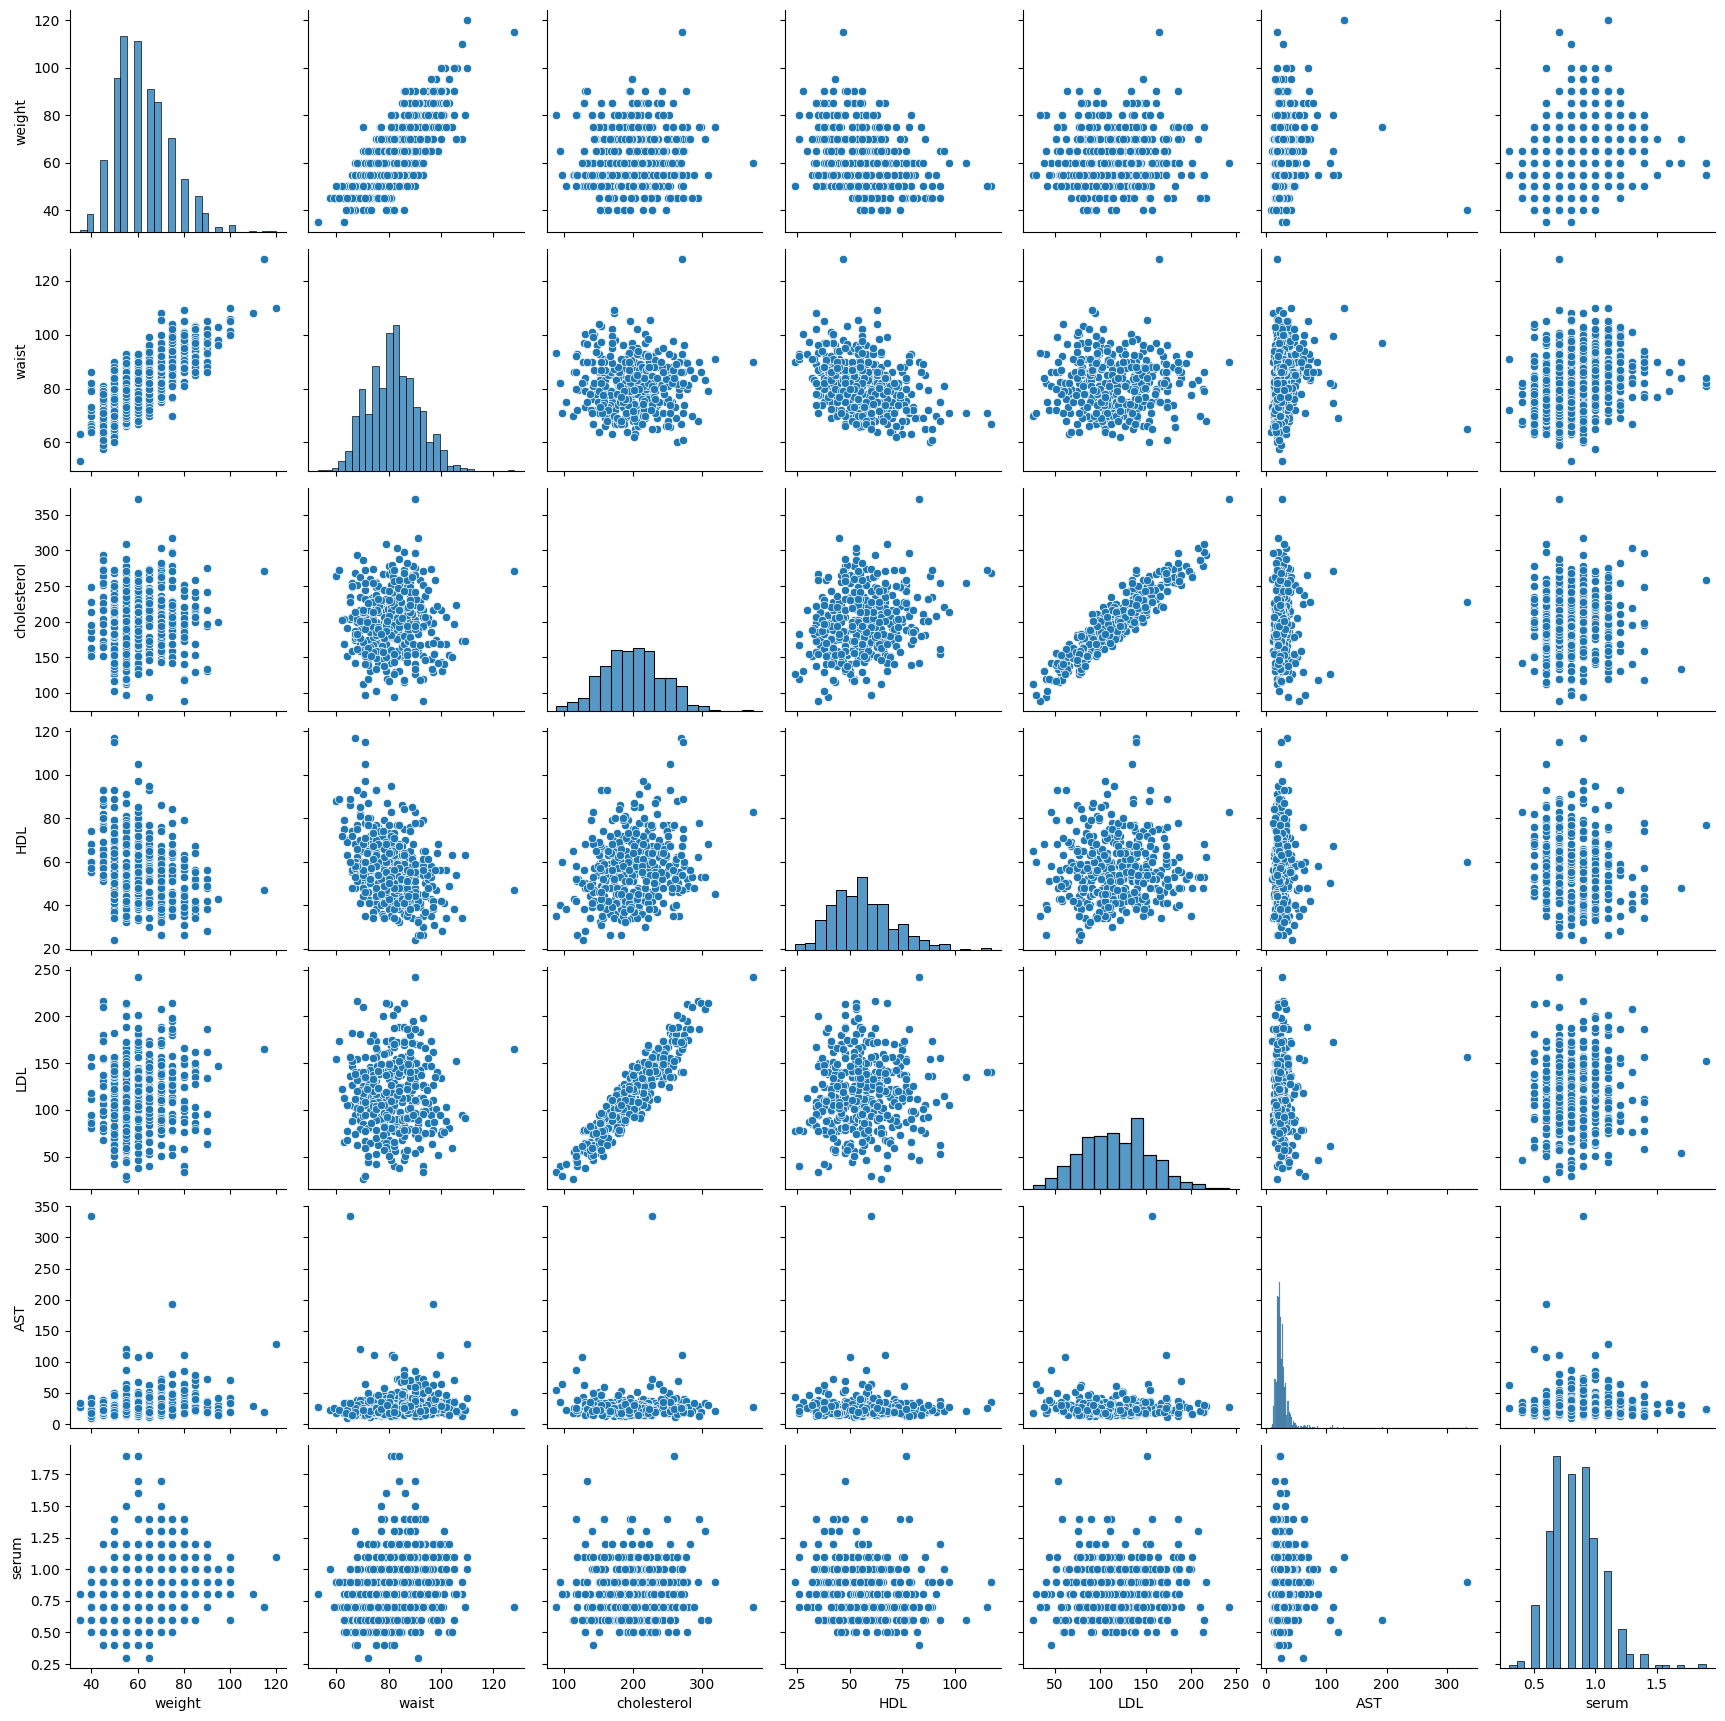

In [ ]:
# pairplot
sns.pairplot(x)

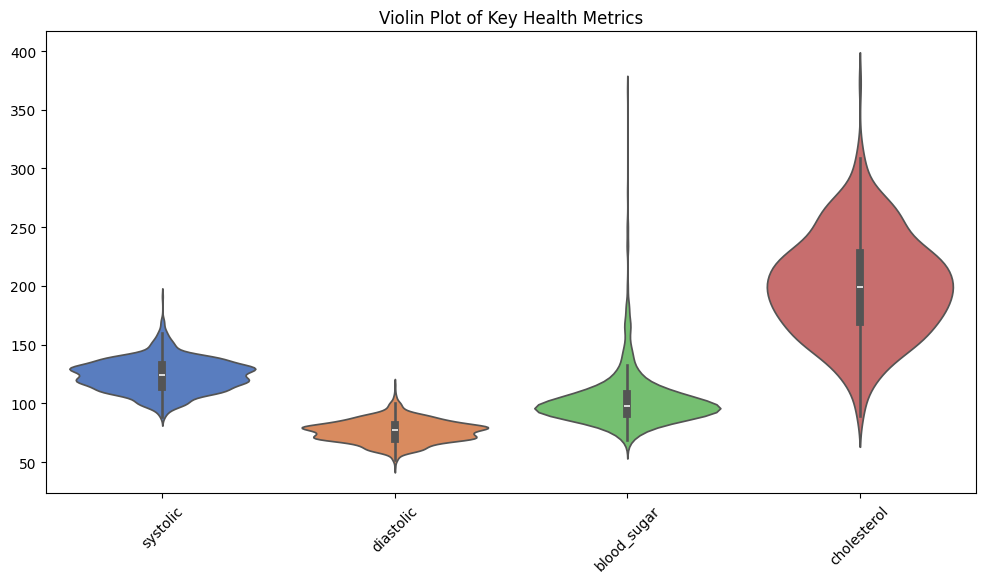

In [ ]:
# 바이올린 플랏
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['systolic', 'diastolic', 'blood_sugar', 'cholesterol']], palette='muted')
plt.title("Violin Plot of Key Health Metrics")
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-dc1c28747a81>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['blood_sugar'], shade=True, color='red', label='Blood Sugar')
<ipython-input-17-dc1c28747a81>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cholesterol'], shade=True, color='blue', label='Cholesterol')


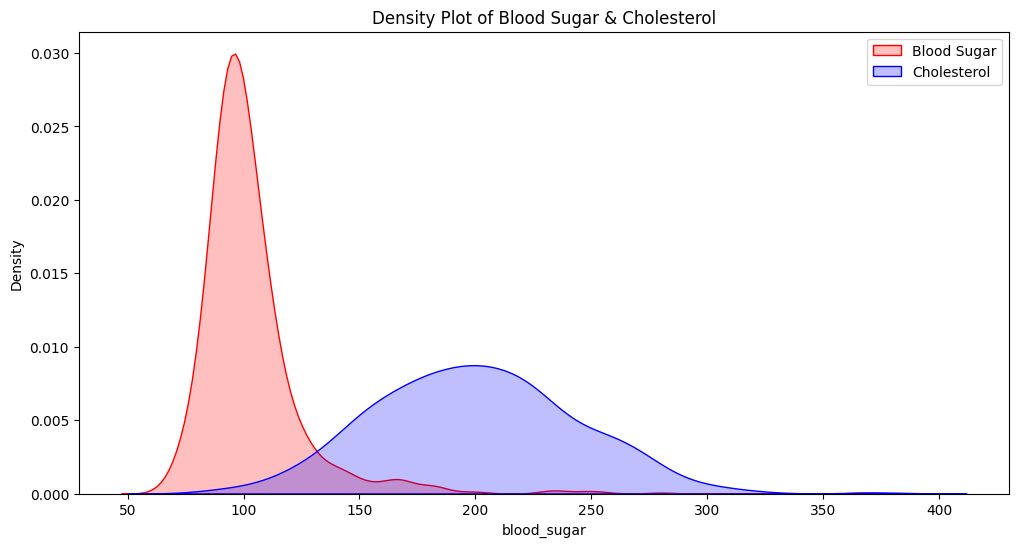

In [ ]:
# 밀도 플롯 (Kernel Density Estimation, KDE)
plt.figure(figsize=(12, 6))
sns.kdeplot(df['blood_sugar'], shade=True, color='red', label='Blood Sugar')
sns.kdeplot(df['cholesterol'], shade=True, color='blue', label='Cholesterol')
plt.title("Density Plot of Blood Sugar & Cholesterol")
plt.legend()
plt.show()

### **이상치**

Q2.  주제를 보고 빈칸에 적절한 코드를 작성해 완성시켜 주세요

In [7]:
# 이상치 탐색 (IQR 사용)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("이상치 개수:\n", outliers)

이상치 개수:
 year               0
city_code          0
gender             0
age_code           7
height             0
weight            14
waist              7
eye_left         118
eye_right        116
hear_left         52
hear_right        41
systolic          13
diastolic         10
blood_sugar       70
cholesterol      395
triglycerides    397
HDL              390
LDL              394
hemoglobin        14
urine_protein     75
serum              9
AST               59
ALT               60
GTP               89
smoking            0
drinking           0
oral_check         0
dental_caries     48
tartar           158
open_date          0
dtype: int64


### **데이터 전처리**

Q3. 주제를 보고 빈칸에 적절한 코드를 작성해 완성시켜 주세요.

In [12]:
# 결측치 처리
## SimpleImputer은 결측치를 채우는 방법을 제공하는 사이킷런의 클래스로, strategy='median'을 사용해 각 열의 중앙값으로 결측치를 채웁니다.
imputer = SimpleImputer(strategy='median')
df.fillna(df.median(), inplace=True)

#이상치 조정
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#범주형 데이터 처리
## include=['object'] 사용하여 범주형 데이터만 선택
## drop_first=True를 사용하여 첫번째 변수 제거-> 더미변수 함정 방지
## 주의!! OneHotEncoder의 경우 drop='first' 파라미터를 사용
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)

In [11]:
# 데이터 전처리 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 1 to 992
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           271 non-null    int64         
 1   city_code      271 non-null    int64         
 2   gender         271 non-null    int64         
 3   age_code       271 non-null    int64         
 4   height         271 non-null    int64         
 5   weight         271 non-null    int64         
 6   waist          271 non-null    float64       
 7   eye_left       271 non-null    float64       
 8   eye_right      271 non-null    float64       
 9   hear_left      271 non-null    int64         
 10  hear_right     271 non-null    int64         
 11  systolic       271 non-null    float64       
 12  diastolic      271 non-null    float64       
 13  blood_sugar    271 non-null    float64       
 14  cholesterol    271 non-null    float64       
 15  triglycerides  271 non-null 

In [ ]:
df.head()

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,0.0,1.0,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,0.0,1.0,2021-12-29
11,2020,41,2,11,150,45,63.0,0.6,0.5,1,...,0.6,31.0,23.0,24.0,3,1,0,0.0,1.0,2021-12-29
13,2020,44,2,10,160,75,89.0,0.5,0.9,1,...,0.9,24.0,22.0,15.0,1,1,0,0.0,1.0,2021-12-29
14,2020,11,2,11,145,50,75.4,0.9,1.0,1,...,0.6,28.0,25.0,18.0,1,1,0,0.0,1.0,2021-12-29


### **변수 선택 (랜덤포레스트 기반)**

In [ ]:
# y에 가장 큰 영향을 주는 x를 분석하는 것이 목표

# 랜덤포레스트 회귀 작동 원리
#1. 데이터 샘플링 (여러개의 결정트리 생성)
#2. 트리학습 (샘플링된 데이터와 일부 랜덤 선택된 feature만 사용하여 학습)
#3. 결과 평균화 (여러 트리의 결과를 평균내어 최종 값 예측)

In [ ]:
# 데이터 선택
x = df[['height', 'weight', 'waist', 'blood_sugar',
        'cholesterol', 'triglycerides', 'HDL', 'LDL', 'hemoglobin',
        'smoking', 'drinking', 'oral_check']]
y = df['systolic']

# 모델 학습
model = RandomForestRegressor()
model.fit(x, y)

# 변수 중요도 계산 코드
## model 학습을 하면 feature_importances_ 속성 안에 변수중요도값이 저장되어 있습니다.
feature_importances = pd.Series(model.feature_importances_, index=x.columns)

# 출력
print("변수 중요도:\n", feature_importances.sort_values(ascending=False))

변수 중요도:
 waist            0.305122
blood_sugar      0.216724
hemoglobin       0.215916
height           0.094591
weight           0.084702
smoking          0.033946
drinking         0.028108
oral_check       0.020890
cholesterol      0.000000
triglycerides    0.000000
HDL              0.000000
LDL              0.000000
dtype: float64


Q4. x에서 'diastolic' 변수를 포함시키지 않은 이유: 수축기와 이완기의 경우 직관적으로 높은 상관관계를 가지기 때문에 제거해야 의미있는 결과를 얻을 수 있다.(변수 이해도 문제)

Q5. 결과값을 붙여놓고 어떤 변수가 'systolic'과 가장 높은 상관관계를 갖는지 적어주세요.

In [13]:
# 결과값:
변수 중요도:
 waist            0.305122
blood_sugar      0.216724
hemoglobin       0.215916
height           0.094591
weight           0.084702
smoking          0.033946
drinking         0.028108
oral_check       0.020890
cholesterol      0.000000
triglycerides    0.000000
HDL              0.000000
LDL              0.000000
dtype: float64
# 가장 중요한 변수: waist

SyntaxError: invalid syntax (<ipython-input-13-c437442eed71>, line 2)

### **차원 축소 & 스케일링**

Q6. 코드 내에 제시되어 있는 문제에 따라 코드를 작성해주세요.

In [ ]:
# 데이터 스케일링 (정규화)
## 평균=0, 분산=1로 변환시키는 코드를 빈칸에 작성해주세요.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# PCA 객체 생성 및 차원 축소
## n_components는 몇 개의 주성분으로 차원을 축소할 건지 결정합니다.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 출력
print("PCA 설명된 분산 비율:", pca.explained_variance_ratio_)

PCA 설명된 분산 비율: [0.37738763 0.15998857]


Q7. 아래 빈칸을 채워 출력값의 의미를 적어주세요.

A. 첫 번째 주성분(PC1)이 전체 데이터 변동성의 38%를 설명하고, 두 번째 주성분은 16%를 설명합니다.

### **파생 변수**

In [ ]:
# 파생 변수 생성 (예시: BMI = 체중(kg) / 키(m)^2)
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2

In [ ]:
df[['BMI','weight','height']]

,BMI,weight,height
1,28.888889,65,150
2,22.892820,55,155
5,24.835646,85,185
7,25.390625,65,160
10,22.892820,55,155
...,...,...,...
992,24.444444,55,150
994,25.390625,65,160
996,25.711662,70,165
998,24.444444,55,150


Q8. 원하는 파생변수를 생성해주세요.
  예시: 혈압차이, 총 콜레스테롤 비율, 혈당 위험도 등
